In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_excel('breast-cancer-wisconsin.train.xlsx')
df_test = pd.read_excel('breast-cancer-wisconsin.test.xlsx')

In [3]:
train = df_train
test = df_test

In [4]:
train.shape

(420, 10)

In [5]:
test.shape

(279, 10)

In [6]:
train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,4.466667,3.209524,3.238095,2.838095,3.266667,9.809524,3.438095,2.835714,1.635714,2.695238
std,2.788715,3.080295,3.004448,2.884818,2.278955,45.232330,2.446268,3.052314,1.790498,0.953564
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,3.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,333.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

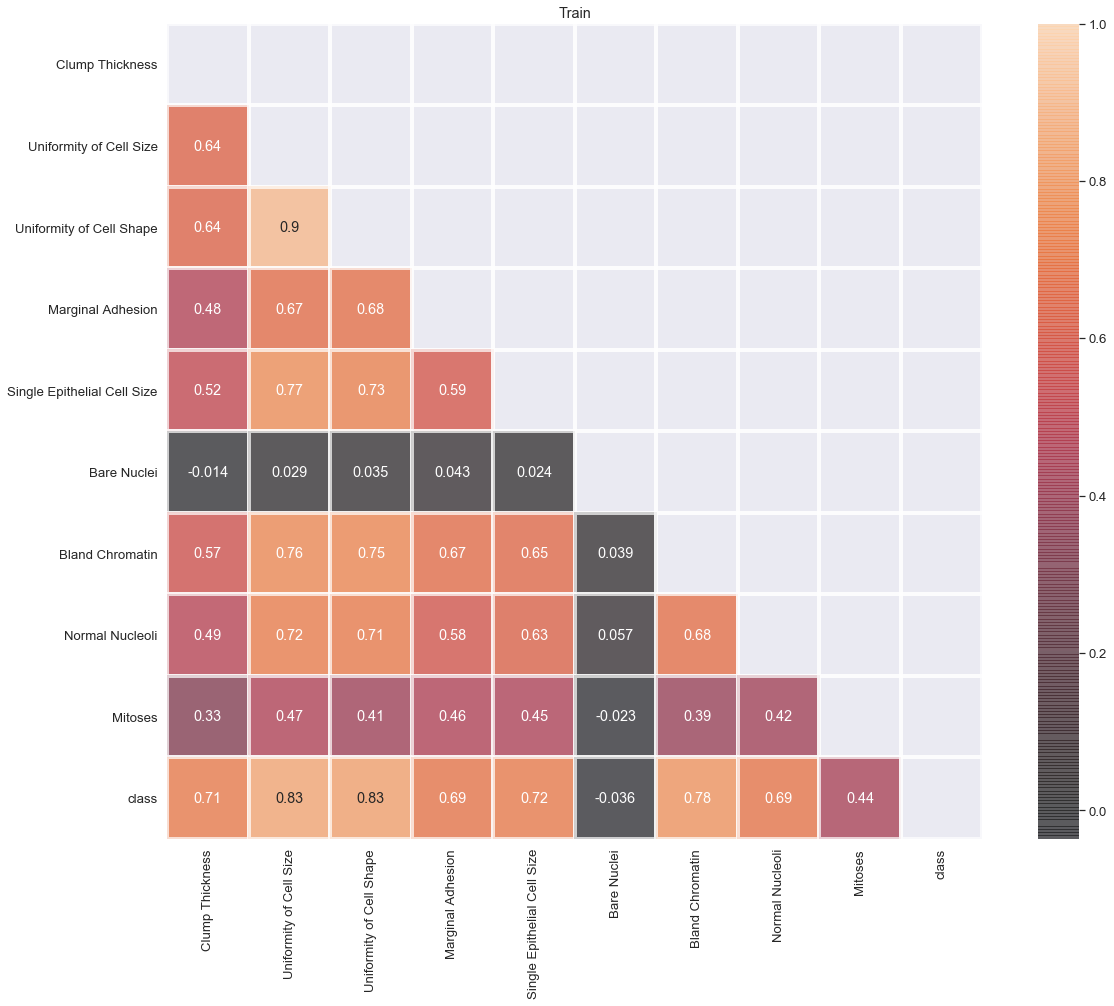

In [8]:
plot_df(train, 'Train')

In [9]:
print(train.columns)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'class'],
      dtype='object')


In [10]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [11]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [12]:
tr_ans = train[class_name]
ts_ans = test[class_name]
class_count = len(tr_ans.unique())
print(class_count)

2


In [13]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [14]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

#결측치 채우기 if 결측치가 ?일 경우 - 먼저 ?를 특정한수(ex.333)으로 변경

from sklearn.impute import SimpleImputer

rep_0 = SimpleImputer(missing_values=333, strategy="mean")

tr_data = rep_0.fit_transform(tr_data)
ts_data = rep_0.fit_transform(ts_data)

In [15]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans = np.array(tr_ans)
ts_ans = np.array(ts_ans)

In [16]:
tr_ans

array([2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,

In [17]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [18]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [19]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
  return model

In [20]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [21]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,12]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [22]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/64
420/420 [==============================] - 7s 17ms/sample - loss: 1.9894 - acc: 0.8119
Epoch 2/64
420/420 [==============================] - 1s 2ms/sample - loss: 1.7630 - acc: 0.9119
Epoch 3/64
420/420 [==============================] - 1s 2ms/sample - loss: 1.7308 - acc: 0.9167
Epoch 4/64
420/420 [==============================] - 1s 3ms/sample - loss: 1.6852 - acc: 0.9381 0s - loss: 1.7319 - 
Epoch 5/64
420/420 [==============================] - 1s 2ms/sample - loss: 1.7178 - acc: 0.9286
Epoch 6/64
420/420 [==============================] - 1s 2ms/sample - loss: 1.7080 - acc: 0.9190
Epoch 7/64
420/420 [==============================] - 1s 2ms/sample - loss: 1.6436 - acc: 0.9405
Epoch 8/64
420/420 [==============================] - 1s 3ms/sam

In [25]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
420/420 [==============================] - 5s 12ms/sample - loss: 1.1942 - acc: 0.6333
Epoch 2/64
420/420 [==============================] - 0s 612us/sample - loss: 0.9571 - acc: 0.8119
Epoch 3/64
420/420 [==============================] - 0s 648us/sample - loss: 0.8756 - acc: 0.8643
Epoch 4/64
420/420 [==============================] - 0s 576us/sample - loss: 0.8113 - acc: 0.8857
Epoch 5/64
420/420 [==============================] - 0s 645us/sample - loss: 0.7538 - acc: 0.9286
Epoch 6/64
420/420 [==============================] - 0s 693us/sample - loss: 0.7717 - acc: 0.8929
Epoch 7/64
420/420 [==============================] - 0s 645us/sample - loss: 0.7222 - acc: 0.9190
Epoch 8/64
420/420 [==============================] - 0s 631us/sample - loss: 0.7288 - acc: 0.9214
Epoch 9/64
420/420 [==============================] - 0s 665us/sample - loss: 0.6835 - acc: 0.9452
Epoch 10/64
420/420 [==============================] - 0s 711us/sample - loss: 0.6608 - acc: 0.9429
Epoch 11/6

In [26]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.966667 using {'activation': 'elu', 'hidden_layers': 12, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.954762 (0.029928) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.947619 (0.026298) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.964286 (0.015430) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.950000 (0.032472) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.952381 (0.023570) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.952381 (0.029354) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.959524 (0.017817) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.954762 (0.024281) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot

In [27]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.964286 using {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'he_normal', 'neurons': 32}
0.950000 (0.036422) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.957143 (0.021028) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.945238 (0.037495) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.954762 (0.029928) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.952381 (0.027562) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.954762 (0.024281) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.950000 (0.026726) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.961905 (0.012141) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_unif

In [28]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.9605734767025089
Confusion Matrix
[[177   7]
 [  4  91]]

Classification Report
              precision    recall  f1-score   support

         2.0       0.98      0.96      0.97       184
         4.0       0.93      0.96      0.94        95

   micro avg       0.96      0.96      0.96       279
   macro avg       0.95      0.96      0.96       279
weighted avg       0.96      0.96      0.96       279



In [29]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.96415770609319
Confusion Matrix
[[179   5]
 [  5  90]]

Classification Report
              precision    recall  f1-score   support

         2.0       0.97      0.97      0.97       184
         4.0       0.95      0.95      0.95        95

   micro avg       0.96      0.96      0.96       279
   macro avg       0.96      0.96      0.96       279
weighted avg       0.96      0.96      0.96       279



In [30]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)